Trying the IMDB_binary classification with only top 10000 words in the training data and as per the Deep Learning with Python github repo

https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb



In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


The argument num_words=10000 means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows us to work with vector data of manageable size.

In [7]:
# Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

max([max(sequence) for sequence in train_data])

9999

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [46]:
# Here's what our samples look like now:

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [22]:
x_train[0].tolist()

[0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [4]:
# We should also vectorize our labels, which is straightforward:
y_train = np.asarray(train_labels).astype('float32')#to match the float type data values in x_train and x_test
y_test = np.asarray(test_labels).astype('float32')

There are two key architecture decisions to be made about such stack of dense layers:

How many layers to use.
How many "hidden units" to chose for each layer.

A relu (rectified linear unit) is a function meant to zero-out negative values, while a sigmoid "squashes" arbitrary values into the [0, 1] interval, thus outputting something that can be interpreted as a probability.


In [5]:
# Let's try 3 hidden layers with 128 hidden units with relu activation

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:


x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
partial_x_train.shape

(15000, 10000)

In [66]:
x_val.shape

(10000, 10000)

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 3s 91ms/step - loss: 0.5147 - accuracy: 0.7647 - val_loss: 0.3216 - val_accuracy: 0.8796
Epoch 2/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2651 - accuracy: 0.9024 - val_loss: 0.3097 - val_accuracy: 0.8755
Epoch 3/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1831 - accuracy: 0.9338 - val_loss: 0.2747 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1287 - accuracy: 0.9583 - val_loss: 0.3167 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.0826 - accuracy: 0.9726 - val_loss: 0.3795 - val_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1003 - accuracy: 0.9797 - val_loss: 0.3732 - val_accuracy: 0.8817
Epoch 7/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0093 - accuracy: 0.9988 - val_loss: 0.5280 - val_accuracy: 0.8809
Epoch 8/20
30

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

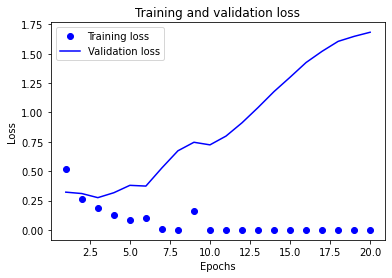

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


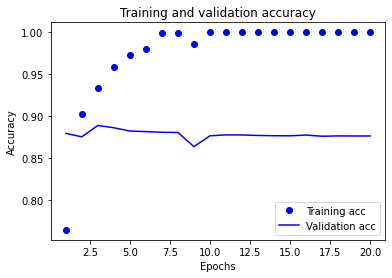

In [11]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
#To get unseen data from the test set to test the model's performance on

x_test1 = x_test[:24000]
x_test_unseen = x_test[24000:]

y_test1 = y_test[:24000]
y_test_unseen = y_test[24000:]

In [13]:

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test1, y_test1)

Epoch 1/3
49/49 [==============================] - 2s 41ms/step - loss: 0.4445 - accuracy: 0.8059
Epoch 2/3
49/49 [==============================] - 2s 41ms/step - loss: 0.2420 - accuracy: 0.9024
Epoch 3/3
750/750 [==============================] - 2s 3ms/step - loss: 0.2871 - accuracy: 0.8824


In [14]:
results

[0.2871445417404175, 0.8823750019073486]

In [15]:
y_predict=model.predict(x_test_unseen)

In [16]:
len(y_predict)

1000

In [17]:
y_predict[994:]

array([[0.9281801 ],
       [0.987608  ],
       [0.5152517 ],
       [0.16119531],
       [0.10660419],
       [0.7023964 ]], dtype=float32)

In [18]:
y_test_unseen[994:]

array([1., 1., 1., 0., 0., 0.], dtype=float32)

Having three hidden layers with 128 hidden units with relu as activation function has accuracy in the final results go from 87.02 to 88.23. Is this the right direction? It is clear that the models that I have built so far with three hidden layers with 32, 64, 128 hidden units gave a max of 88% validation accuracy on test set. Not bad. It's a clear indication that if intend to go beyond the 88% accuracy then I could think of the following ideas:
1. Add more data
2. Add complex features. In this situation that would like adding a embedding layer